In [ ]:
%load_ext autoreload
%autoreload 2
import LCN_model
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import cv2
from tqdm import tqdm
import matplotlib.patches as mpatches
import imageio
import os
import matplotlib.image as mpimg
import matplotlib.pylab as pl

## LCN vs CNN

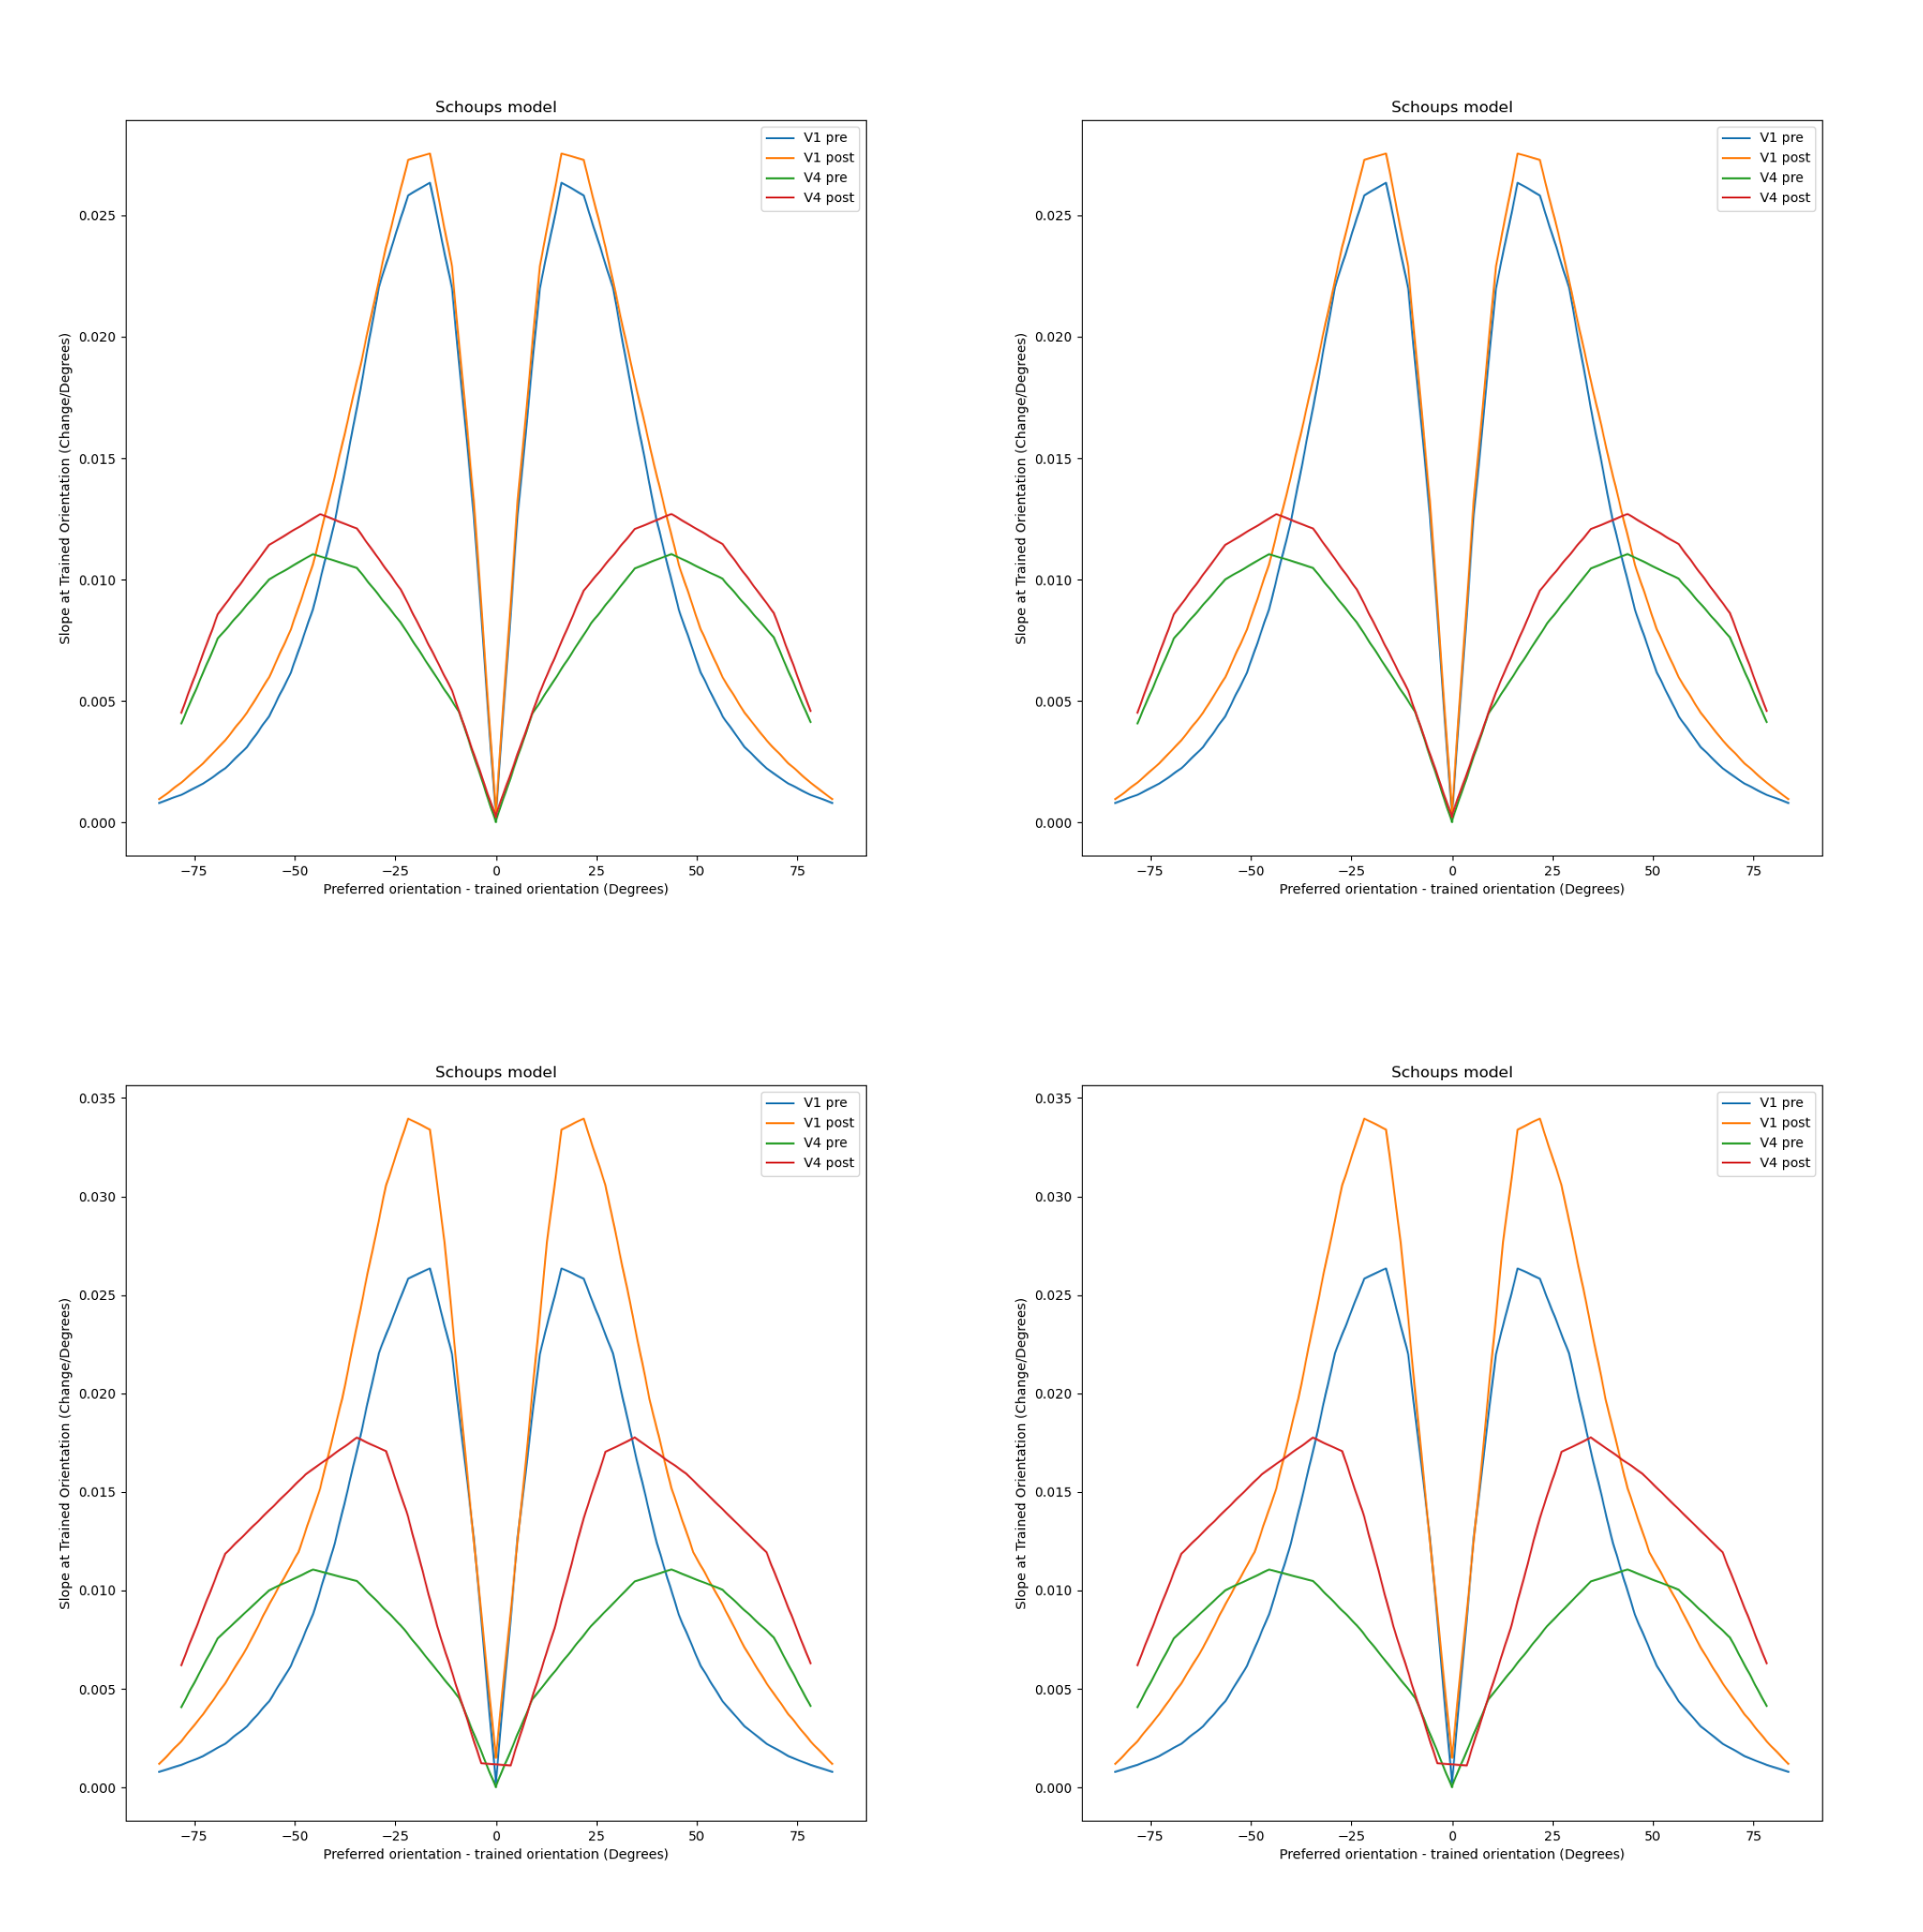

In [17]:
scales = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]
v1_scale = 0.5
v4_scale = 2
j = np.abs((torch.tensor(scales) - v1_scale)).argmin().item()
i = np.abs((torch.tensor(scales) - v4_scale)).argmin().item()
  
fig, axs = plt.subplots(2, 2, figsize = (30, 30))
savepath = 'trained_models/high_fixed_normalized/weight_scale_' + str(scales[j]).replace('.', '') + '_001_' + str(scales[i]).replace('.', '') + '/Schoups_32_orientations_model_OTC.png'
img_A = mpimg.imread(savepath)
axs[0, 0].imshow(img_A)
axs[0, 0].axis("off");

savepath2 = 'trained_models/high_fixed_normalized/weight_scale_' + str(scales[j]).replace('.', '') + '_001_' + str(scales[i]).replace('.', '') + '/Schoups_32_orientations_model_OTC.png'
img_B = mpimg.imread(savepath2)
axs[0, 1].imshow(img_B)
axs[0, 1].axis("off");

savepath = 'trained_models/conv_high_fixed_normalized/weight_scale_' + str(scales[j]).replace('.', '') + '_001_' + str(scales[i]).replace('.', '') + '/Schoups_32_orientations_model_OTC.png'
img_C = mpimg.imread(savepath)
axs[1, 0].imshow(img_C)
axs[1, 0].axis("off");

savepath2 = 'trained_models/conv_high_fixed_normalized/weight_scale_' + str(scales[j]).replace('.', '') + '_001_' + str(scales[i]).replace('.', '') + '/Schoups_32_orientations_model_OTC.png'
img_D = mpimg.imread(savepath2)
axs[1, 1].imshow(img_D)
axs[1, 1].axis("off");

plt.tight_layout()


## Schoups vs Ghose 

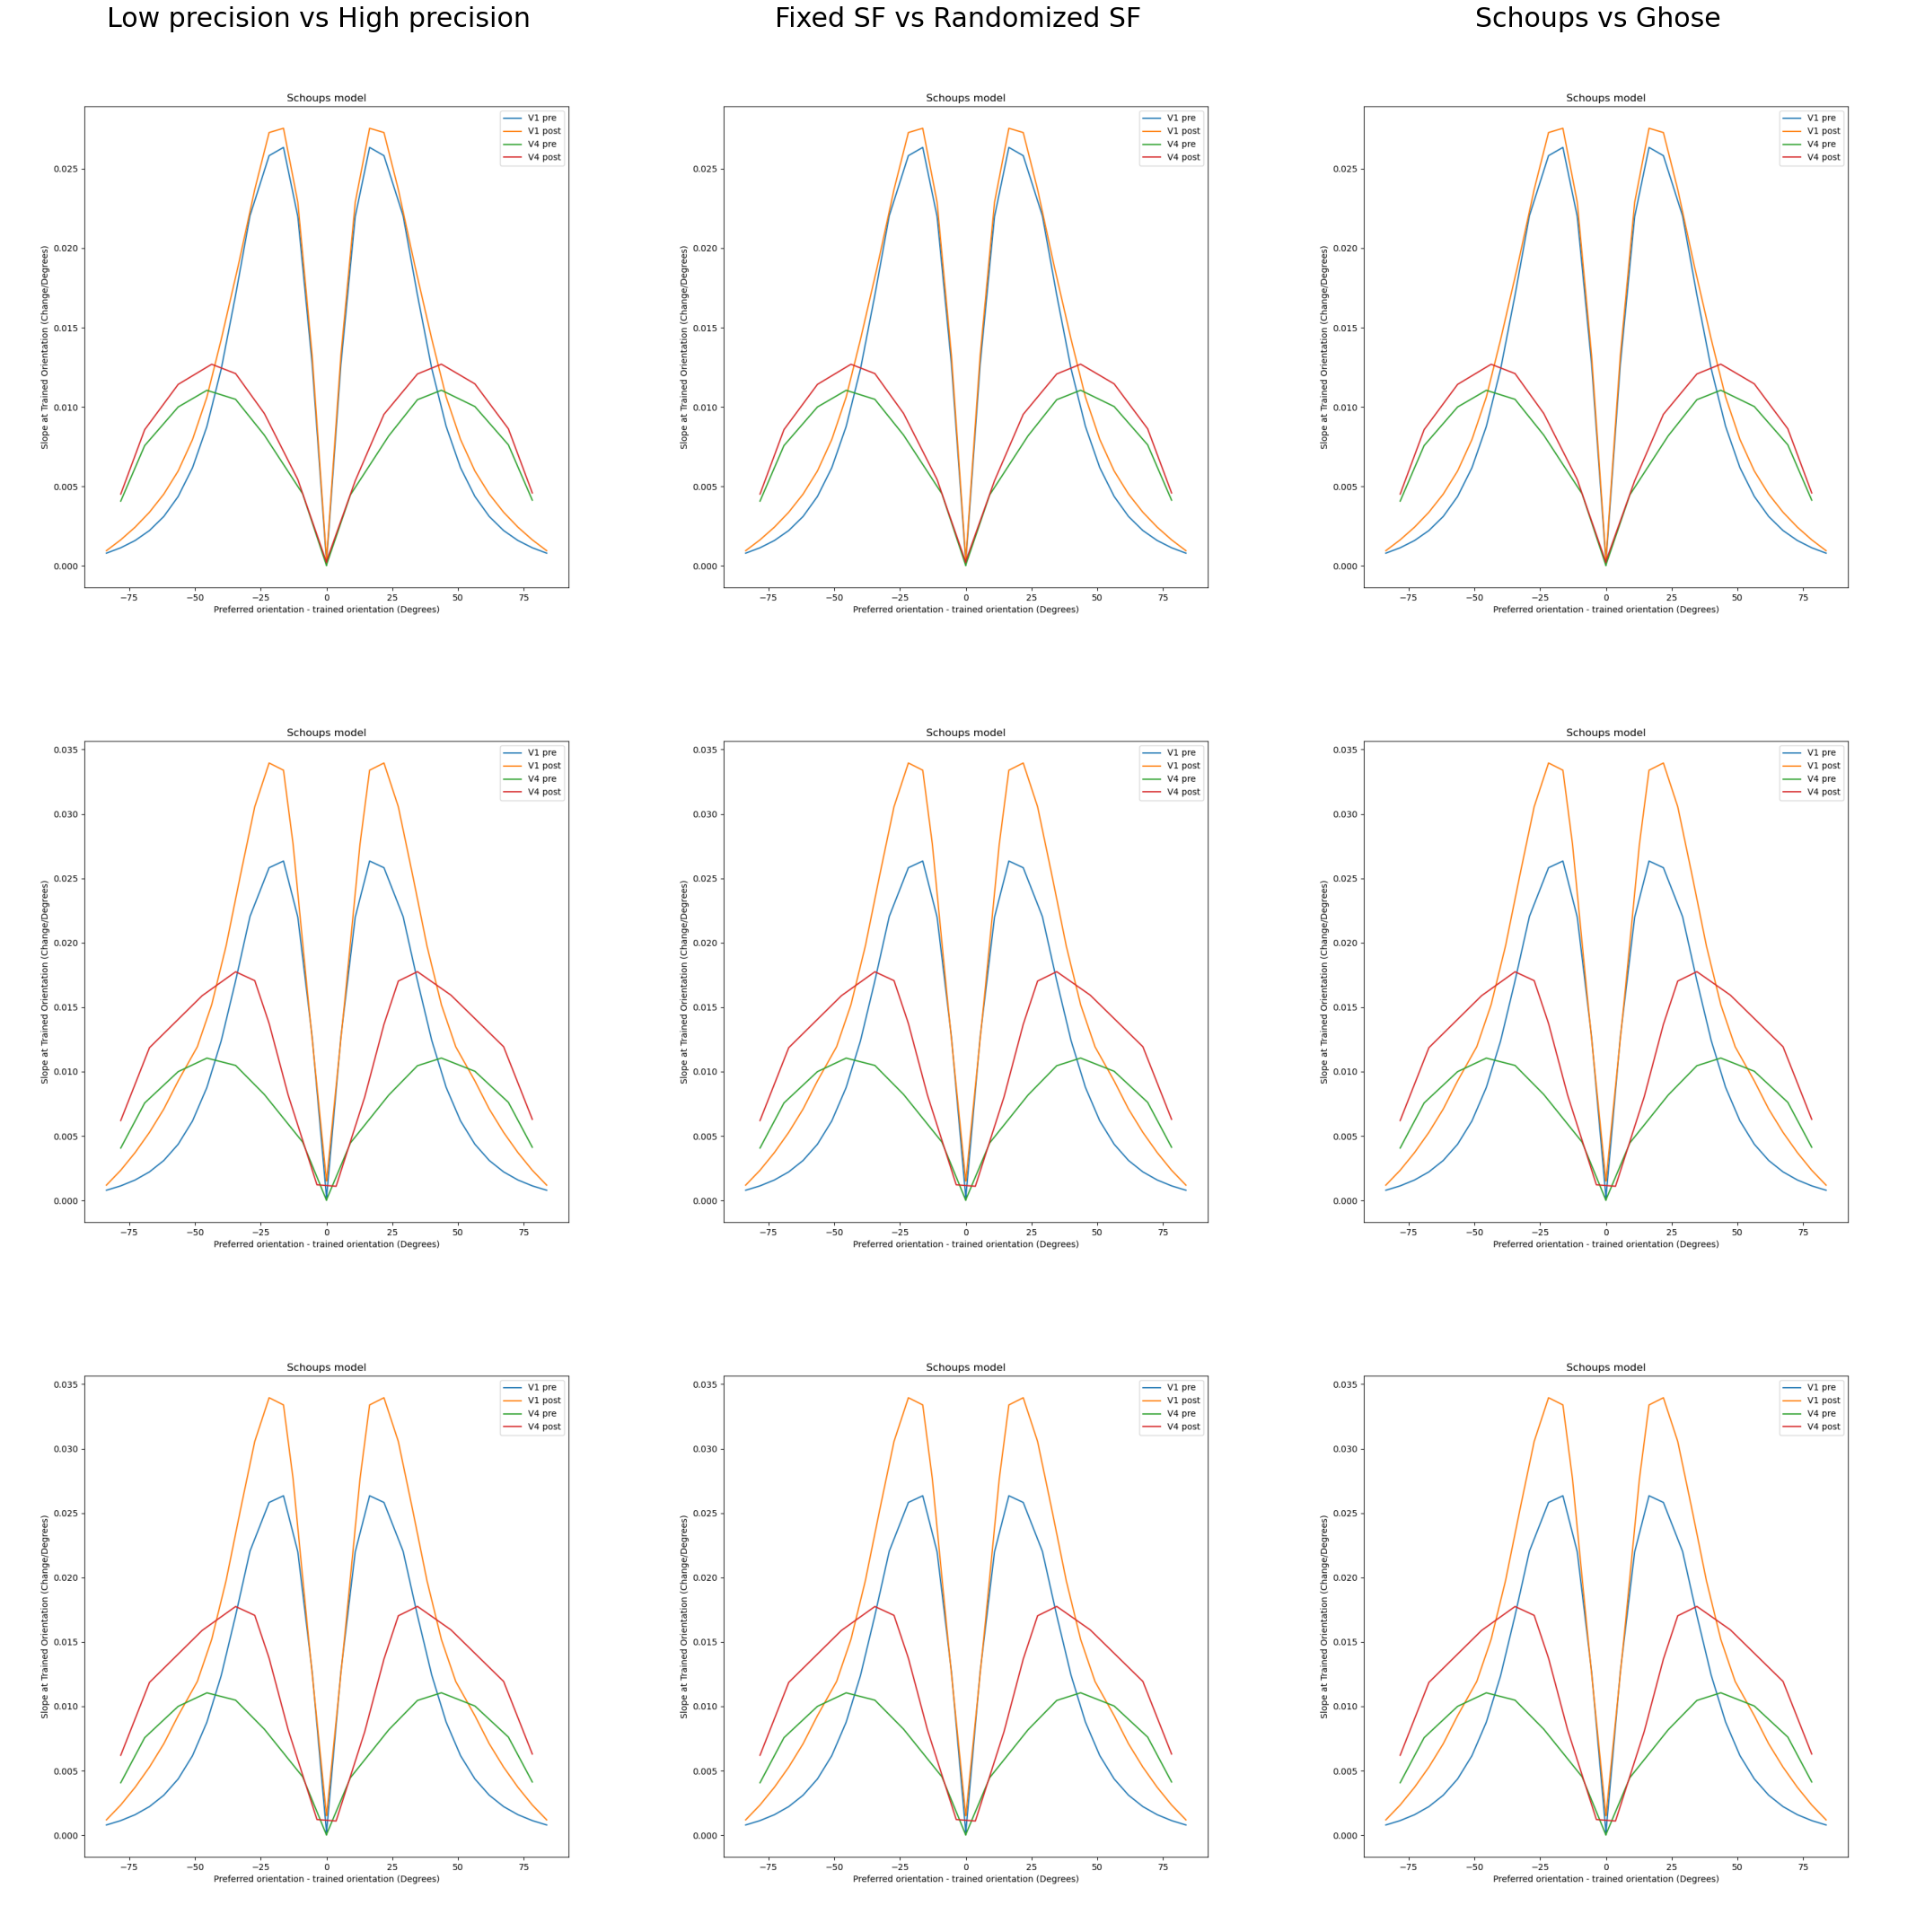

In [26]:
v1_scale = 0.5
phase_scale = 0.01
v4_scale = 2

model = '/weight_scale_' + str(v1_scale).replace('.', '') + '_' + str(phase_scale).replace('.', '') + '_' + str(v4_scale).replace('.', '') + '/'

plt.figure(figsize = [40, 40])

plt.subplot(4, 4, 1)
plt.bar(["V1", "V4"], [schoups_net.v1_amplitude_difference, schoups_net.v4_amplitude_difference], color = "black");
plt.ylabel("% increase of amplitude");
plt.title("Change in amplitude for tuning curves");

plt.subplot(4, 4, 2)
plt.bar(["V1", "V4"], [schoups_net.v1_bandwidth_difference, schoups_net.v4_bandwidth_difference], color = "black");
plt.ylabel("% increase of bandwidth");
plt.title("Change in bandwidth for tuning curves");


  
fig, axs = plt.subplots(3, 6, figsize = (30, 60))

schoups_savepath = 'trained_models/high_fixed_normalized' + model
ghose_savepath = 'trained_models/low_randomized_normalized' + model
schoups_v1_amplitude_difference = torch.load(schoups_savepath + "v1_amplitude")
schoups_v4_amplitude_difference = torch.load(schoups_savepath + "v4_amplitude")
ghose_v1_amplitude_difference = torch.load(ghose_savepath + "v1_amplitude")
ghose_v4_amplitude_difference = torch.load(ghose_savepath + "v4_amplitude")
axs[0, 0].bar(["V1", "V4"], [schoups_v1_amplitude_difference, schoups_v4_amplitude_difference], color = "black");
axs[0, 0].ylabel("% increase of amplitude");
axs[0, 0].set_title("Schoups vs Ghose", fontsize = 30)

axs[0, 1].bar(["V1", "V4"], [ghose_v1_amplitude_difference, ghose_v4_amplitude_difference], color = "black");
axs[0, 1].ylabel("% increase of amplitude");

schoups_v1_bandwidth_difference = torch.load(schoups_savepath + "v1_bandwidth")
schoups_v4_bandwidth_difference = torch.load(schoups_savepath + "v4_bandwidth")
ghose_v1_bandwidth_difference = torch.load(ghose_savepath + "v1_bandwidth")
ghose_v4_bandwidth_difference = torch.load(ghose_savepath + "v4_bandwidth")
axs[1, 0].bar(["V1", "V4"], [schoups_v1_bandwidth_difference, schoups_v4_bandwidth_difference], color = "black");
axs[1, 0].ylabel("% increase of bandwidth");

axs[1, 1].bar(["V1", "V4"], [ghose_v1_bandwidth_difference, ghose_v4_bandwidth_difference], color = "black");
axs[1, 1].ylabel("% increase of bandwidth");

schoups_otc = mpimg.imread(schoups_savepath + "OTC.png")
axs[2, 0].imshow(schoups_otc)
axs[2, 0].axis("off");

ghose_otc = mpimg.imread(ghose_savepath + "OTC.png")
axs[2, 1].imshow(ghose_otc)
axs[2, 1].axis("off");

low_savepath = 'trained_models/low_fixed_normalized' + model
high_savepath = 'trained_models/high_randomized_normalized' + model
low_v1_amplitude_difference = torch.load(low_savepath + "v1_amplitude")
low_v4_amplitude_difference = torch.load(low_savepath + "v4_amplitude")
high_v1_amplitude_difference = torch.load(high_savepath + "v1_amplitude")
high_v4_amplitude_difference = torch.load(high_savepath + "v4_amplitude")
axs[0, 2].bar(["V1", "V4"], [low_v1_amplitude_difference, low_v4_amplitude_difference], color = "black");
axs[0, 2].ylabel("% increase of amplitude");
axs[0, 2].set_title("Low precision vs High precision", fontsize = 30)

axs[0, 3].bar(["V1", "V4"], [high_v1_amplitude_difference, high_v4_amplitude_difference], color = "black");
axs[0, 3].ylabel("% increase of amplitude");

low_v1_bandwidth_difference = torch.load(low_savepath + "v1_bandwidth")
low_v4_bandwidth_difference = torch.load(low_savepath + "v4_bandwidth")
high_v1_bandwidth_difference = torch.load(high_savepath + "v1_bandwidth")
high_v4_bandwidth_difference = torch.load(high_savepath + "v4_bandwidth")
axs[1, 2].bar(["V1", "V4"], [low_v1_bandwidth_difference, low_v4_bandwidth_difference], color = "black");
axs[1, 2].ylabel("% increase of bandwidth");

axs[1, 3].bar(["V1", "V4"], [high_v1_bandwidth_difference, high_v4_bandwidth_difference], color = "black");
axs[1, 3].ylabel("% increase of bandwidth");

low_otc = mpimg.imread(low_savepath + "OTC.png")
axs[2, 2].imshow(low_otc)
axs[2, 2].axis("off");

high_otc = mpimg.imread(high_savepath + "OTC.png")
axs[2, 3].imshow(high_otc)
axs[2, 3].axis("off");

fixed_savepath = 'trained_models/high_fixed_normalized' + model
randomized_savepath = 'trained_models/high_randomized_normalized' + model
fixed_v1_amplitude_difference = torch.load(fixed_savepath + "v1_amplitude")
fixed_v4_amplitude_difference = torch.load(fixed_savepath + "v4_amplitude")
randomized_v1_amplitude_difference = torch.load(randomized_savepath + "v1_amplitude")
randomized_v4_amplitude_difference = torch.load(randomized_savepath + "v4_amplitude")
axs[0, 4].bar(["V1", "V4"], [fixed_v1_amplitude_difference, fixed_v4_amplitude_difference], color = "black");
axs[0, 4].ylabel("% increase of amplitude");
axs[0, 4].set_title("Fixed SF vs Randomized SF", fontsize = 30)

axs[0, 5].bar(["V1", "V4"], [randomized_v1_amplitude_difference, randomized_v4_amplitude_difference], color = "black");
axs[0, 5].ylabel("% increase of amplitude");

schoups_v1_bandwidth_difference = torch.load(fixed_savepath + "v1_bandwidth")
schoups_v4_bandwidth_difference = torch.load(fixed_savepath + "v4_bandwidth")
randomized_v1_bandwidth_difference = torch.load(randomized_savepath + "v1_bandwidth")
randomized_v4_bandwidth_difference = torch.load(randomized_savepath + "v4_bandwidth")
axs[1, 4].bar(["V1", "V4"], [fixed_v1_bandwidth_difference, fixed_v4_bandwidth_difference], color = "black");
axs[1, 4].ylabel("% increase of bandwidth");

axs[1, 5].bar(["V1", "V4"], [randomized_v1_bandwidth_difference, randomized_v4_bandwidth_difference], color = "black");
axs[1, 5].ylabel("% increase of bandwidth");

fixed_otc = mpimg.imread(fixed_savepath + "OTC.png")
axs[2, 4].imshow(fuxed_otc)
axs[2, 4].axis("off");

randomized_otc = mpimg.imread(randomized_savepath + "OTC.png")
axs[2, 5].imshow(randomized_otc)
axs[2, 5].axis("off");


plt.tight_layout()


## Peak point of change

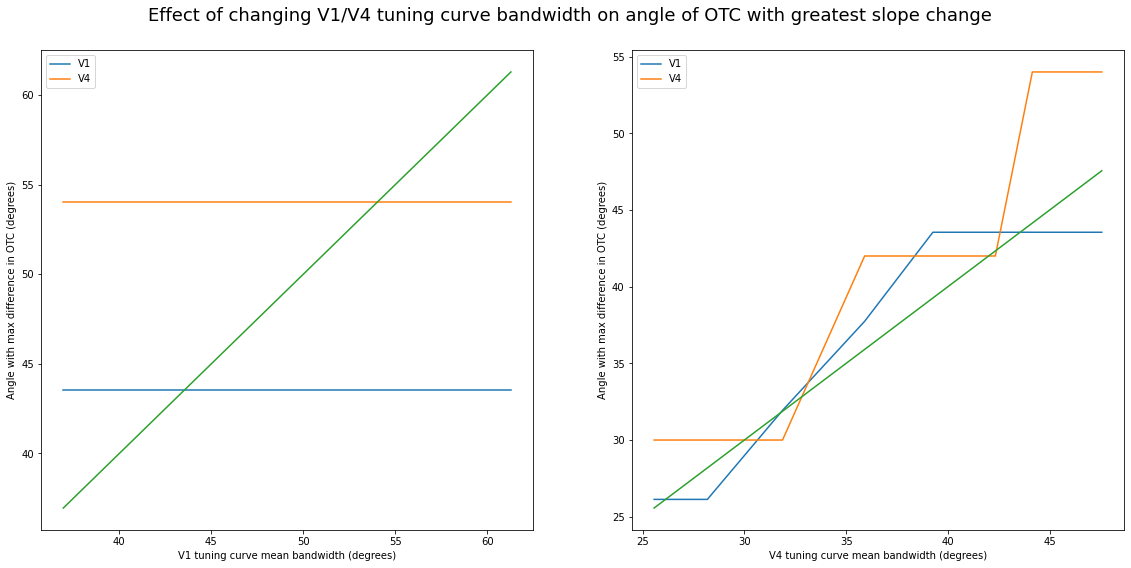

In [18]:
v1_gammas = [i/10 for i in range(5, 16)]
v4_orientation_stds = [i/10 for i in range(1, 11)]
v1_xs = []
v1_ys = []
v1_v4_ys = []
v4_xs = []
v4_ys = []
v4_v1_ys = []


for i in range(len(v1_gammas)):
    v1_gamma_savepath = 'trained_models/changing_bandwidths/' + str(v1_gammas[i]).replace('.', '') + '_07/v1_max_diff_angle.pt'
    v4_gamma_savepath = 'trained_models/changing_bandwidths/' + str(v1_gammas[i]).replace('.', '') + '_07/v4_max_diff_angle.pt'
    v1_bandwidth_savepath = 'trained_models/changing_bandwidths/' + str(v1_gammas[i]).replace('.', '') + '_07/v1_bandwidth.pt'
    
    v1_gamma = torch.load(v1_gamma_savepath)
    v4_gamma = torch.load(v4_gamma_savepath)
    v1_bandwidth = torch.load(v1_bandwidth_savepath)
    
    v1_xs.append(v1_bandwidth)
    v1_ys.append(v1_gamma)
    v1_v4_ys.append(v4_gamma)
    
for j in range(len(v4_orientation_stds)):
    v4_orientation_std_savepath = 'trained_models/changing_bandwidths/05_' + str(v4_orientation_stds[j]).replace('.', '') + '/v4_max_diff_angle.pt'
    v1_orientation_std_savepath = 'trained_models/changing_bandwidths/05_' + str(v4_orientation_stds[j]).replace('.', '') + '/v1_max_diff_angle.pt'
    v4_bandwidth_savepath = 'trained_models/changing_bandwidths/05_' + str(v4_orientation_stds[j]).replace('.', '') + '/v4_bandwidth.pt'
 
    v4_orientation_std = torch.load(v4_orientation_std_savepath)
    v1_orientation_std = torch.load(v1_orientation_std_savepath)
    v4_bandwidth = torch.load(v4_bandwidth_savepath)
    
    v4_xs.append(v4_bandwidth)
    v4_ys.append(v4_orientation_std)
    v4_v1_ys.append(v1_orientation_std)
        
plt.figure(figsize = (30, 30))

plt.subplot(3, 3, 1)
plt.plot(v1_xs, v1_ys)
plt.plot(v1_xs, v1_v4_ys)
plt.plot(v1_xs, v1_xs)
plt.xlabel("V1 tuning curve mean bandwidth (degrees)")
plt.ylabel("Angle with max difference in OTC (degrees)")
plt.legend(["V1", "V4"]);
plt.suptitle("Effect of changing V1/V4 tuning curve bandwidth on angle of OTC with greatest slope change", x = 0.37, y = 0.9, fontsize = 18)

plt.subplot(3, 3, 2)
plt.plot(v4_xs, v4_v1_ys)
plt.plot(v4_xs, v4_ys)
plt.plot(v4_xs, v4_xs)
plt.xlabel("V4 tuning curve mean bandwidth (degrees)")
plt.ylabel("Angle with max difference in OTC (degrees)")
plt.legend(["V1", "V4"]);